# Redes Bayesianas
Las redes Bayesianas corresponden a un caso particular de factorización de una probabilidad conjunto en que cada factor es también una distribución.

El criterio para detectar independencia entre condicional en un grafo probabilístico corresponde a la d-separación, que nos dice que si $x_i$ y $x_j$ están bloqueados por un subconjunto $S \in X \setminus \{x_i,x_j\}$ de las variables, entonces $x_i$ es independiente de $x_j$ dado $S$. Esto nos lleva también a concluir que en un árbol, cada variable $x_i$ es independiente de sus hijos y sus abuelos, dado el valor de las variables en el conjunto $S$ que contiene a sus padres. 


En general, podemos decir que podemos garantizar que $x_i \perp x_j \vert S$,si no existe ninguna ruta activa entre ambos vertices. Una ruta se dice activa si todas las tripletas que la componen se encuentran activas.

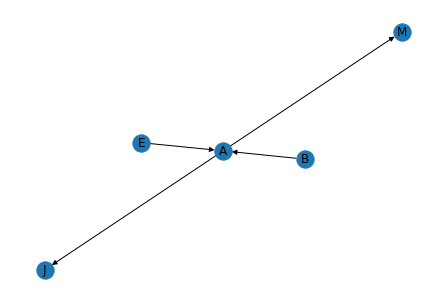

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()
G.add_edges_from([('B','A'),('E','A'),('A','J'),('A','M')])
pos=nx.spring_layout(G)
nx.draw(G,pos=pos)
nx.draw_networkx_labels(G,pos)
plt.show()


In [20]:
from networkx.algorithms.d_separation import d_separated

d_separated(G,{'B'},{'E'},{})

d_separated(G,{'B'},{'E'},{'A'})

d_separated(G,{'B'},{'M'},{'A'})

d_separated(G,{'B'},{'M'},{})

d_separated(G,{'J'},{'M'},{})

d_separated(G,{'J'},{'M'},{'A'})

True

# Red Asia

In [20]:
! pip install --user pgmpy
! pip install --user  wget

In [21]:
import wget
import gzip
f = wget.download('http://www.bnlearn.com/bnrepository/asia/asia.bif.gz')
with gzip.open('asia.bif.gz', mode='rb') as f:
    file_content=f.read()
with open('asia.bif', mode='wb') as f:
    f.write(file_content)

In [22]:
from pgmpy.readwrite import BIFReader
reader = BIFReader('asia.bif')
!rm asia.bif
!rm asia.bif.gz
model = reader.get_model()

KeyboardInterrupt: ignored

In [ ]:
#reader=BIFReader('data/asia.bif')
#model=reader.get_model()

In [ ]:
model.nodes()

In [ ]:
from IPython.display import Image
Image('data/asia.png')

In [ ]:
model.is_active_trail('tub', 'smoke', observed='dysp')

In [ ]:
model.is_active_trail('tub', 'smoke')

In [ ]:
model.is_active_trail('lung', 'bronc', observed='smoke')

In [ ]:
model.is_active_trail('asia', 'smoke', observed='lung')

In [ ]:
model.is_active_trail('asia', 'smoke', observed=['lung','dysp'])

In [ ]:
model.get_independencies()

In [ ]:
model.local_independencies('tub')

In [ ]:
model.is_active_trail('lung', 'tub', observed='either')